In [150]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [279]:
def VidToFrame(load_path):
    frames = list()
    try:
        vidcap = cv2.VideoCapture(load_path)
        success, image = vidcap.read()

        if not success :
            print('Video Read Error')
        cnt = 0
        while success:
            success, image = vidcap.read()

            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
            lower_skin = np.array([0, 133, 77])
            upper_skin = np.array([255, 173, 127])

            mask = cv2.inRange(hsv, lower_skin, upper_skin)
            
            width = 1920
            height = 1080
            mask = cv2.resize(mask, dsize=(width, height), interpolation=cv2.INTER_LINEAR)

            if cv2.waitKey(10) == 27:                     # exit if Escape is hit
                break
            frames.append(mask)
        vidcap.release()
    except Exception:
        pass
    frames = np.asarray(frames)
    return frames

In [127]:
def FrameCount(load_path):
    vidcap = cv2.VideoCapture(load_path)
    frameCount = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
    return int(frameCount)

In [305]:
def getDataFrame(load_path):
    ### 레이블 전처리
    labels=[]
    label_num = 0
    label_dict={'cute':0, 'hi':1, 'love':2, 'thank':3, 'wait':4}

    data = []
    for parent, dirname, filename in os.walk(load_path):
        if dirname != []: #디렉토리이름
            continue
        else:
            # one-hot encoding
            one_hot = [0]*len(label_dict)
            one_hot[label_num] = 1
            for _ in range(len(filename)):
                labels.append(one_hot)
            label_num += 1
            # load_data
            for f in filename:
                data.append(VidToFrame(parent+'\\'+f))
    data = np.asarray(data)
    labels = np.asarray(labels,dtype=np.int)

    return data,labels

In [306]:
if __name__ == '__main__':
    load_path = 'F:\\raw\\'
    data, label = getDataFrame(load_path)
    framecount = FrameCount(load_path)

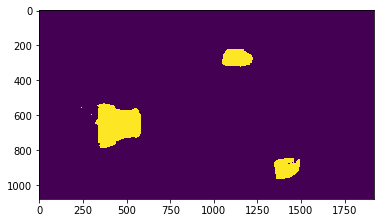

In [315]:
plt.imshow(data[0][0])

In [310]:
label

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])